In [1]:
import pandas as pd
import numpy as np

# File path
file_path = 'train_FD001.txt'

# According to NASA CMAPSS documentation:
# 26 sensor columns + 3 setting columns + engine_id + cycle
cols = ['engine_id', 'cycle',
        'setting1', 'setting2', 'setting3'] + \
       [f'sensor{i}' for i in range(1, 22)]

# Read data (space-separated)
df = pd.read_csv(file_path, sep=r'\s+', header=None, names=cols)

print("Shape:", df.shape)
df.head()


Shape: (20631, 26)


,engine_id,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [2]:
from sklearn.preprocessing import MinMaxScaler

# Drop ID and non-sensor columns
sensor_data = df.drop(columns=['engine_id', 'cycle', 'setting1', 'setting2', 'setting3'])

# Normalize sensor readings
scaler = MinMaxScaler()
sensor_data_scaled = pd.DataFrame(scaler.fit_transform(sensor_data), columns=sensor_data.columns)

# Display result
print("Shape after scaling:", sensor_data_scaled.shape)
sensor_data_scaled.head()


Shape after scaling: (20631, 21)


,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,0.0,0.183735,0.406802,0.309757,0.0,1.0,0.726248,0.242424,0.109755,0.0,...,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662
1,0.0,0.283133,0.453019,0.352633,0.0,1.0,0.628019,0.212121,0.100242,0.0,...,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014
2,0.0,0.343373,0.369523,0.370527,0.0,1.0,0.710145,0.272727,0.140043,0.0,...,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375
3,0.0,0.343373,0.256159,0.331195,0.0,1.0,0.740741,0.318182,0.124518,0.0,...,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386
4,0.0,0.349398,0.257467,0.404625,0.0,1.0,0.668277,0.242424,0.149960,0.0,...,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502


In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers

# Step 3: Build Autoencoder
input_dim = sensor_data_scaled.shape[1]

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(14, activation='relu')(input_layer)
encoded = Dense(7, activation='relu')(encoded)

# Bottleneck (compressed representation)
bottleneck = Dense(3, activation='relu')(encoded)

# Decoder
decoded = Dense(7, activation='relu')(bottleneck)
decoded = Dense(14, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

# Compile model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 21)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 14)             │           308 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 14)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 21)             │           315 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 892 (3.48 KB)

 Trainable params: 892 (3.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0752 - val_loss: 0.0109
Epoch 2/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0091 - val_loss: 0.0044
Epoch 3/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0048 - val_loss: 0.0043
Epoch 4/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 5/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 6/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0043 - val_loss: 0.0038
Epoch 7/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 8/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 9/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 10/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 11/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 12/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

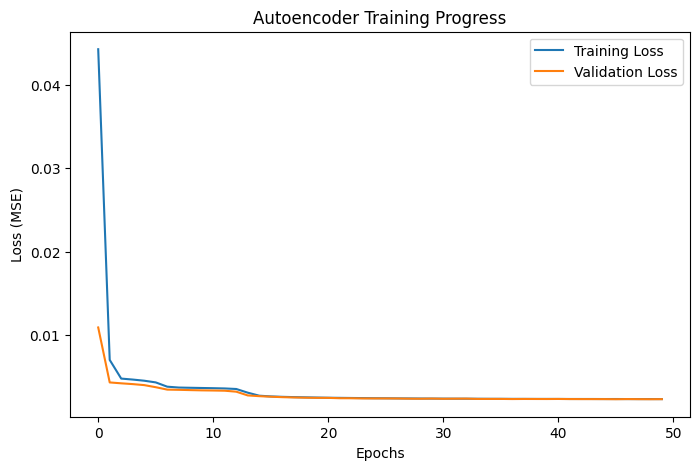

In [4]:
import matplotlib.pyplot as plt

# Train the Autoencoder
history = autoencoder.fit(
    sensor_data_scaled, sensor_data_scaled,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    shuffle=True
)

# Plot training vs validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Progress')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


In [5]:
import numpy as np
import pandas as pd

# Predict reconstructions
X = sensor_data_scaled.values
X_hat = autoencoder.predict(X, verbose=0)

# Mean squared error per row = anomaly score
recon_error = np.mean((X - X_hat)**2, axis=1)

# Keep IDs for plotting timelines
scores = df[['engine_id','cycle']].reset_index(drop=True).copy()
scores['recon_error'] = recon_error
scores.head()


,engine_id,cycle,recon_error
0,1,1,0.001963
1,1,2,0.002160
2,1,3,0.002108
3,1,4,0.003587
4,1,5,0.001312


In [6]:
# Option A: percentile rule
threshold = np.percentile(recon_error, 99)

# Option B (alt): mean + 3*std  (uncomment to try)
# threshold = recon_error.mean() + 3*recon_error.std()

scores['anomaly'] = (scores['recon_error'] > threshold).astype(int)

print("Threshold:", threshold)
print("Overall anomaly rate:", scores['anomaly'].mean().round(4))
scores.head()


Threshold: 0.00587029773108348
Overall anomaly rate: 0.01


,engine_id,cycle,recon_error,anomaly
0,1,1,0.001963,0
1,1,2,0.002160,0
2,1,3,0.002108,0
3,1,4,0.003587,0
4,1,5,0.001312,0


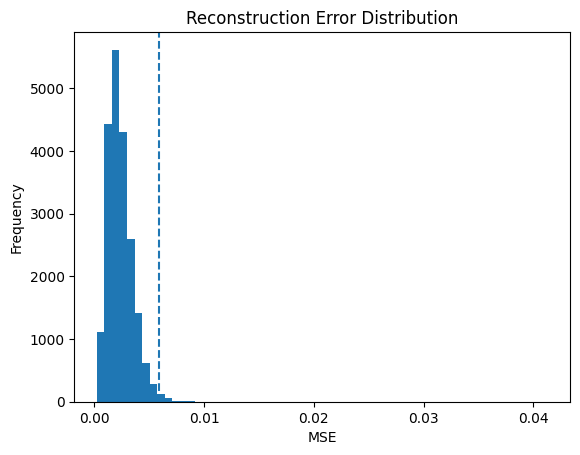

engine_id
9     0.044776
51    0.037559
33    0.030000
79    0.025126
91    0.022222
81    0.020833
77    0.019481
93    0.019355
7     0.019305
72    0.018779
Name: anomaly, dtype: float64


In [7]:
import matplotlib.pyplot as plt

# Error distribution with threshold
plt.hist(recon_error, bins=60)
plt.axvline(threshold, linestyle='--')
plt.title('Reconstruction Error Distribution')
plt.xlabel('MSE'); plt.ylabel('Frequency')
plt.show()

# Anomaly rate per engine (quick sanity check)
rate_per_engine = scores.groupby('engine_id')['anomaly'].mean().sort_values(ascending=False)
print(rate_per_engine.head(10))


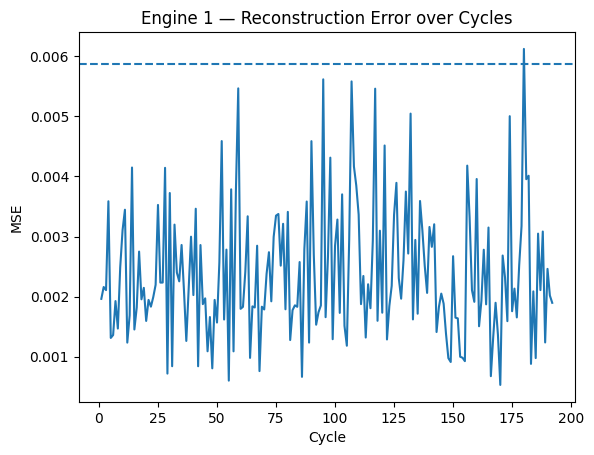

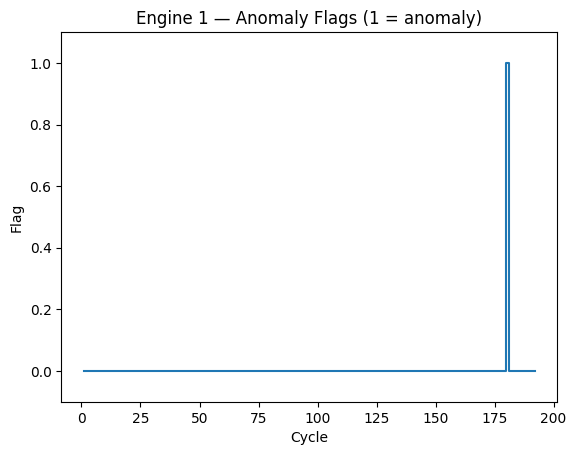

In [8]:
eng = int(scores['engine_id'].iloc[0])  # first engine; change as you like
g = scores[scores['engine_id'] == eng].sort_values('cycle')

plt.plot(g['cycle'], g['recon_error'])
plt.axhline(threshold, linestyle='--')
plt.title(f'Engine {eng} — Reconstruction Error over Cycles')
plt.xlabel('Cycle'); plt.ylabel('MSE'); plt.show()

plt.step(g['cycle'], g['anomaly'], where='post')
plt.title(f'Engine {eng} — Anomaly Flags (1 = anomaly)')
plt.xlabel('Cycle'); plt.ylabel('Flag'); plt.ylim(-0.1, 1.1); plt.show()
